<a href="https://colab.research.google.com/github/ReddiSrujan/Artificial-Neural-Network/blob/main/CGAN_6_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Need to change path where you have stored the inpur data
according to your drive in below code

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
# path='/content/drive/MyDrive/DATA_FOR_TRAINING/data_with_ln.xlsx'
path='/content/drive/MyDrive/Colab Notebooks/Copy of ANN_Mixed effects_parameters (1).xlsx'
df=pd.read_excel(path)

In [ ]:
df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,Event_ID,Station_Code,p1,p2,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,7.2,1.448706,28.1,3.040444,14.8,3,'TK-1999-0415','487',287.243651,287.778335,...,33.697907,41.238109,45.258712,40.420785,39.047703,37.087862,41.741655,34.410111,25.929112,18.764234
1,7.2,1.472756,29.7,3.138082,14.8,3,'TK-1999-0415','496',866.327320,866.368547,...,42.095884,47.017775,45.723388,40.694432,38.113252,34.359949,37.235464,30.873648,23.467135,18.052741
2,7.2,1.462398,29.0,2.862430,14.8,3,'TK-1999-0415','498',356.889020,359.769485,...,25.928256,29.031144,27.236888,23.629686,18.838901,13.180069,9.805799,6.325060,4.206391,3.258723
3,7.7,2.184975,153.1,2.499687,33.0,4,'INT-UT19990920_174715','A003',110.141775,110.179380,...,138.916309,95.033452,68.359020,46.948893,30.303297,16.983311,11.739661,8.512827,6.620943,5.338358
4,7.7,2.196729,157.3,2.621176,33.0,4,'INT-UT19990920_174715','A005',98.663838,98.713918,...,71.055669,53.395156,40.126078,24.183898,17.398558,10.354711,7.303623,5.407089,4.174573,3.358575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11670,4.1,2.174932,149.6,2.863858,5.3,4,'EMSC-20141110_0000089','AC11',0.252263,0.298357,...,0.002906,0.001895,0.001698,0.001256,0.001092,0.000772,0.000654,0.000581,0.000491,0.000424
11671,4.2,1.206826,16.1,2.863858,12.8,2,'EMSC-20141112_0000018','AC11',8.898541,9.056810,...,0.082606,0.065970,0.055369,0.048396,0.039826,0.030683,0.024270,0.020317,0.017459,0.015356
11672,4.6,1.424882,26.6,2.863858,15.7,3,'EMSC-20141113_0000034','AC11',12.622056,12.728151,...,0.162941,0.117380,0.092157,0.078066,0.062200,0.043506,0.032054,0.025180,0.020750,0.017741
11673,4.6,1.392697,24.7,2.863858,27.8,3,'EMSC-20141211_0000058','AC11',27.223642,27.251711,...,0.276113,0.216499,0.172844,0.150445,0.128844,0.101492,0.083900,0.074143,0.066109,0.059446


In [ ]:
df = df.drop(['Event_ID', 'Station_Code'], axis=1)

In [ ]:
df=df.iloc[:,:43]

In [ ]:
# df.iloc[:, 4:] = df.iloc[:, 4:] / 10

In [ ]:
df.shape

(11675, 43)

In [ ]:

df.describe()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
count,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,...,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000
mean,4.789876,1.854041,106.129799,2.767355,11.109807,2.657645,16.272227,16.343085,17.386263,20.525721,...,3.155132,2.638005,2.243881,1.954249,1.706960,1.299528,1.003112,0.778040,0.617614,0.491190
std,0.818973,0.431932,86.463956,0.170693,8.082019,1.337273,52.774533,53.101967,57.560163,67.274161,...,17.131336,14.828268,13.215570,12.176634,11.380216,9.230172,7.542173,6.133783,5.103192,4.177799
min,4.000000,-0.301030,0.500000,2.296665,0.100000,1.000000,0.004252,0.004253,0.004297,0.004347,...,0.000021,0.000017,0.000015,0.000013,0.000011,0.000009,0.000008,0.000007,0.000006,0.000006
25%,4.100000,1.586587,38.600000,2.630224,6.200000,1.000000,0.307279,0.307091,0.314997,0.339246,...,0.025279,0.018765,0.014601,0.012075,0.009411,0.006473,0.004776,0.003701,0.002953,0.002464
50%,4.500000,1.912753,81.800000,2.772102,9.000000,3.000000,1.599381,1.601527,1.659222,1.859272,...,0.095551,0.070742,0.055076,0.045754,0.035953,0.024910,0.018300,0.014173,0.011516,0.009538
75%,5.200000,2.190192,154.950000,2.903361,13.300000,4.000000,7.663731,7.710547,8.116782,9.713422,...,0.443958,0.331960,0.261383,0.221058,0.179603,0.126334,0.093958,0.072782,0.058626,0.048499
max,7.700000,2.678791,477.300000,3.323087,40.000000,4.000000,1152.581270,1199.256888,1571.484694,1711.600881,...,416.532848,312.660172,343.990847,347.640147,331.788345,307.165244,298.479752,300.956712,276.564739,235.595857


In [ ]:
df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,7.2,1.448706,28.1,3.040444,14.8,3,287.243651,287.778335,290.057943,306.131600,...,33.697907,41.238109,45.258712,40.420785,39.047703,37.087862,41.741655,34.410111,25.929112,18.764234
1,7.2,1.472756,29.7,3.138082,14.8,3,866.327320,866.368547,913.802855,1086.132145,...,42.095884,47.017775,45.723388,40.694432,38.113252,34.359949,37.235464,30.873648,23.467135,18.052741
2,7.2,1.462398,29.0,2.862430,14.8,3,356.889020,359.769485,388.841684,458.120462,...,25.928256,29.031144,27.236888,23.629686,18.838901,13.180069,9.805799,6.325060,4.206391,3.258723
3,7.7,2.184975,153.1,2.499687,33.0,4,110.141775,110.179380,110.745799,110.954275,...,138.916309,95.033452,68.359020,46.948893,30.303297,16.983311,11.739661,8.512827,6.620943,5.338358
4,7.7,2.196729,157.3,2.621176,33.0,4,98.663838,98.713918,99.435685,100.935567,...,71.055669,53.395156,40.126078,24.183898,17.398558,10.354711,7.303623,5.407089,4.174573,3.358575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11670,4.1,2.174932,149.6,2.863858,5.3,4,0.252263,0.298357,0.410910,0.260903,...,0.002906,0.001895,0.001698,0.001256,0.001092,0.000772,0.000654,0.000581,0.000491,0.000424
11671,4.2,1.206826,16.1,2.863858,12.8,2,8.898541,9.056810,12.093783,17.346396,...,0.082606,0.065970,0.055369,0.048396,0.039826,0.030683,0.024270,0.020317,0.017459,0.015356
11672,4.6,1.424882,26.6,2.863858,15.7,3,12.622056,12.728151,13.970399,18.021296,...,0.162941,0.117380,0.092157,0.078066,0.062200,0.043506,0.032054,0.025180,0.020750,0.017741
11673,4.6,1.392697,24.7,2.863858,27.8,3,27.223642,27.251711,28.953750,40.313296,...,0.276113,0.216499,0.172844,0.150445,0.128844,0.101492,0.083900,0.074143,0.066109,0.059446


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# # Assuming df is your DataFrame and 'column_to_encode' is the column you want to encode
# encoder = OrdinalEncoder()
# df['Event_ID'] = encoder.fit_transform(df[['Event_ID']])


In [ ]:
# df['Station_Code'] = encoder.fit_transform(df[['Station_Code']])

In [ ]:
# df.shape

In [ ]:
df.iloc[:,6:]=np.log(df.iloc[:,6:])

<Axes: xlabel='p3', ylabel='Density'>

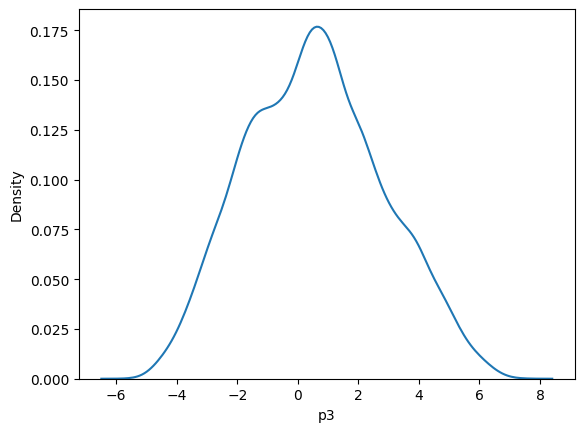

In [ ]:
sns.kdeplot(df.iloc[:,8])

In [ ]:

train_stats = df.describe()
# def norm(x):
#     x = x / abs(train_stats.loc['max'])  # max abs scaling
#     return 2 * (x - 0.5)  # range to [-1, 1]

# df = norm(df)

In [ ]:
df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,7.2,1.448706,28.1,3.040444,14.8,3,5.660331,5.662191,5.670081,5.724015,...,3.517436,3.719363,3.812395,3.699344,3.664784,3.613290,3.731500,3.538350,3.255366,2.931953
1,7.2,1.472756,29.7,3.138082,14.8,3,6.764263,6.764310,6.817615,6.990378,...,3.739950,3.850526,3.822610,3.706091,3.640562,3.536892,3.617262,3.429903,3.155601,2.893298
2,7.2,1.462398,29.0,2.862430,14.8,3,5.877425,5.885464,5.963172,6.127132,...,3.255333,3.368369,3.304572,3.162504,2.935924,2.578706,2.282974,1.844520,1.436605,1.181335
3,7.7,2.184975,153.1,2.499687,33.0,4,4.701768,4.702110,4.707237,4.709118,...,4.933872,4.554229,4.224774,3.849060,3.411257,2.832231,2.462973,2.141574,1.890238,1.674918
4,7.7,2.196729,157.3,2.621176,33.0,4,4.591718,4.592226,4.599511,4.614482,...,4.263464,3.977720,3.692026,3.185687,2.856387,2.337442,1.988371,1.687711,1.429012,1.211517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11670,4.1,2.174932,149.6,2.863858,5.3,4,-1.377284,-1.209465,-0.889382,-1.343606,...,-5.841090,-6.268775,-6.378408,-6.679706,-6.819886,-7.166010,-7.332604,-7.450981,-7.619878,-7.766041
11671,4.2,1.206826,16.1,2.863858,12.8,2,2.185887,2.203517,2.492691,2.853385,...,-2.493679,-2.718553,-2.893730,-3.028348,-3.223245,-3.484044,-3.718534,-3.896285,-4.047881,-4.176279
11672,4.6,1.424882,26.6,2.863858,15.7,3,2.535446,2.543816,2.636941,2.891554,...,-1.814367,-2.142340,-2.384265,-2.550200,-2.777397,-3.134856,-3.440346,-3.681720,-3.875208,-4.031881
11673,4.6,1.392697,24.7,2.863858,27.8,3,3.304086,3.305116,3.365700,3.696681,...,-1.286944,-1.530169,-1.755368,-1.894155,-2.049154,-2.287778,-2.478124,-2.601761,-2.716452,-2.822684


In [ ]:
df.describe()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
count,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,...,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000,11675.000000
mean,4.789876,1.854041,106.129799,2.767355,11.109807,2.657645,0.503619,0.506237,0.548841,0.669409,...,-2.068861,-2.359506,-2.608042,-2.791661,-3.032896,-3.396670,-3.706214,-3.966774,-4.190507,-4.384944
std,0.818973,0.431932,86.463956,0.170693,8.082019,1.337273,2.251233,2.252489,2.263345,2.306715,...,2.281625,2.309289,2.331689,2.342282,2.356899,2.368907,2.371065,2.366944,2.360183,2.350868
min,4.000000,-0.301030,0.500000,2.296665,0.100000,1.000000,-5.460346,-5.460224,-5.449911,-5.438376,...,-10.750649,-10.955020,-11.110574,-11.240619,-11.375833,-11.573364,-11.729372,-11.865524,-11.988357,-12.098041
25%,4.100000,1.586587,38.600000,2.630224,6.200000,1.000000,-1.179998,-1.180612,-1.155193,-1.081031,...,-3.677779,-3.975775,-4.226652,-4.416656,-4.665894,-5.040107,-5.344058,-5.599101,-5.824784,-6.005968
50%,4.500000,1.912753,81.800000,2.772102,9.000000,3.000000,0.469617,0.470957,0.506349,0.620185,...,-2.348091,-2.648721,-2.899037,-3.084486,-3.325533,-3.692468,-4.000874,-4.256413,-4.463975,-4.652499
75%,5.200000,2.190192,154.950000,2.903361,13.300000,4.000000,2.036499,2.042589,2.093934,2.273509,...,-0.812026,-1.102742,-1.341769,-1.509332,-1.717008,-2.068825,-2.364908,-2.620288,-2.836569,-3.026220
max,7.700000,2.678791,477.300000,3.323087,40.000000,4.000000,7.049759,7.089457,7.359776,7.445184,...,6.031965,5.745117,5.840615,5.851168,5.804497,5.727386,5.698702,5.706966,5.622445,5.462118


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

import pickle

import os
import tensorflow as tf
from keras.layers import Concatenate
import keras
from keras.optimizers import Adam

In [ ]:
df.iloc[:,6:]

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,5.660331,5.662191,5.670081,5.724015,5.829419,6.016633,6.436490,6.453105,6.750581,6.513990,...,3.517436,3.719363,3.812395,3.699344,3.664784,3.613290,3.731500,3.538350,3.255366,2.931953
1,6.764263,6.764310,6.817615,6.990378,7.072314,6.970171,7.282541,7.889997,7.841728,8.046819,...,3.739950,3.850526,3.822610,3.706091,3.640562,3.536892,3.617262,3.429903,3.155601,2.893298
2,5.877425,5.885464,5.963172,6.127132,6.113728,6.142766,6.358657,6.757504,6.994435,6.755416,...,3.255333,3.368369,3.304572,3.162504,2.935924,2.578706,2.282974,1.844520,1.436605,1.181335
3,4.701768,4.702110,4.707237,4.709118,4.713791,4.712439,4.722899,4.755087,4.893869,5.283768,...,4.933872,4.554229,4.224774,3.849060,3.411257,2.832231,2.462973,2.141574,1.890238,1.674918
4,4.591718,4.592226,4.599511,4.614482,4.609234,4.615092,4.640922,4.762468,4.935667,5.042286,...,4.263464,3.977720,3.692026,3.185687,2.856387,2.337442,1.988371,1.687711,1.429012,1.211517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11670,-1.377284,-1.209465,-0.889382,-1.343606,-1.185425,-0.970062,-0.548775,-0.245241,-0.987413,-1.300232,...,-5.841090,-6.268775,-6.378408,-6.679706,-6.819886,-7.166010,-7.332604,-7.450981,-7.619878,-7.766041
11671,2.185887,2.203517,2.492691,2.853385,3.017329,3.419592,3.057371,3.500087,2.773305,2.497358,...,-2.493679,-2.718553,-2.893730,-3.028348,-3.223245,-3.484044,-3.718534,-3.896285,-4.047881,-4.176279
11672,2.535446,2.543816,2.636941,2.891554,3.323380,3.747013,3.763634,2.819597,2.804639,2.403721,...,-1.814367,-2.142340,-2.384265,-2.550200,-2.777397,-3.134856,-3.440346,-3.681720,-3.875208,-4.031881
11673,3.304086,3.305116,3.365700,3.696681,3.716430,4.103888,4.140059,4.374101,4.267768,3.925854,...,-1.286944,-1.530169,-1.755368,-1.894155,-2.049154,-2.287778,-2.478124,-2.601761,-2.716452,-2.822684


In [ ]:


# import seaborn as sns
# sns.kdeplot(df1['U_geomean'])


In [ ]:
df.head()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,7.2,1.448706,28.1,3.040444,14.8,3,5.660331,5.662191,5.670081,5.724015,...,3.517436,3.719363,3.812395,3.699344,3.664784,3.613290,3.731500,3.538350,3.255366,2.931953
1,7.2,1.472756,29.7,3.138082,14.8,3,6.764263,6.764310,6.817615,6.990378,...,3.739950,3.850526,3.822610,3.706091,3.640562,3.536892,3.617262,3.429903,3.155601,2.893298
2,7.2,1.462398,29.0,2.862430,14.8,3,5.877425,5.885464,5.963172,6.127132,...,3.255333,3.368369,3.304572,3.162504,2.935924,2.578706,2.282974,1.844520,1.436605,1.181335
3,7.7,2.184975,153.1,2.499687,33.0,4,4.701768,4.702110,4.707237,4.709118,...,4.933872,4.554229,4.224774,3.849060,3.411257,2.832231,2.462973,2.141574,1.890238,1.674918
4,7.7,2.196729,157.3,2.621176,33.0,4,4.591718,4.592226,4.599511,4.614482,...,4.263464,3.977720,3.692026,3.185687,2.856387,2.337442,1.988371,1.687711,1.429012,1.211517


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42)

# Calculate the index for splitting
split_index = int(0.8 * len(df_shuffled))

# Split into training and testing sets
train_df = df_shuffled[:split_index]
testing_df = df_shuffled[split_index:]


In [ ]:
train_df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
11227,5.7,1.936514,86.4,2.658107,8.2,1,1.762430,1.763203,1.769594,1.790770,...,0.465517,0.340421,0.286402,-0.030409,-0.128179,-0.555949,-1.035158,-1.396892,-1.732109,-2.014241
4480,4.3,1.572872,37.4,3.100474,4.7,1,0.055468,0.061224,0.102526,0.495573,...,-3.194475,-3.245937,-3.402803,-3.700430,-4.003672,-4.548221,-4.981687,-5.339362,-5.637324,-5.801588
2142,4.3,1.915927,82.4,3.020278,8.6,4,2.437839,2.444473,2.497324,2.557980,...,-2.286965,-2.480727,-2.708171,-2.876004,-3.014263,-3.268936,-3.469892,-3.638842,-3.781860,-3.904415
7454,4.5,2.084576,121.5,2.862251,8.6,1,-3.625395,-3.624680,-3.621490,-3.599289,...,-4.593339,-5.046748,-5.240462,-5.362222,-5.459964,-5.637868,-5.994112,-6.462940,-6.846710,-7.155487
2348,4.0,1.387390,24.4,3.097674,4.9,1,2.932177,2.937211,3.089184,3.572946,...,-2.474049,-2.725424,-2.915481,-3.042089,-3.206704,-3.417493,-3.595909,-3.755976,-3.896329,-4.018070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,6.3,2.349083,223.4,2.842547,21.5,2,-0.875678,-0.875540,-0.870245,-0.867483,...,-0.594888,-1.098449,-1.156349,-1.365104,-1.654398,-1.991859,-1.790097,-1.961935,-2.029509,-2.095901
9154,4.2,1.503791,31.9,3.000781,5.7,4,2.454526,2.456261,2.538603,2.983227,...,-2.533841,-2.791712,-2.982171,-3.119842,-3.302789,-3.551411,-3.758069,-3.930798,-4.079102,-4.210258
11292,5.2,1.776701,59.8,2.780101,11.0,4,2.026687,2.031961,2.065602,2.151569,...,-2.167845,-2.595022,-2.958021,-3.236530,-3.441949,-3.638558,-3.792917,-3.966191,-4.112299,-4.230707
2376,4.1,0.255273,1.8,2.756712,8.0,4,2.679052,2.718366,3.138886,3.299695,...,-1.132130,-1.504783,-1.807867,-2.022382,-2.300435,-2.680255,-2.972364,-3.201533,-3.386332,-3.539027


In [ ]:
# import pandas as pd
# # path='Copy of ANN_Mixed effects_parameters.xlsx'
# testing_df=pd.read_excel('/content/drive/MyDrive/DATA_FOR_TRAINING/train_data_6_input.xlsx')
# train_df=pd.read_excel('/content/drive/MyDrive/DATA_FOR_TRAINING/testing_data_6_input.xlsx')

In [ ]:
testing_df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
3839,6.1,2.008600,102.0,2.936865,8.3,4,2.183662,2.184004,2.187609,2.195311,...,1.359971,0.901201,0.822175,0.874359,0.567607,0.429569,0.179260,-0.153615,-0.440575,-0.605841
1246,7.7,2.035830,108.6,2.939020,40.0,4,3.214088,3.219104,3.246702,3.276086,...,1.484841,1.158399,0.998772,0.849046,0.614967,0.427042,0.063996,-0.275640,-0.553454,-0.570274
7504,4.3,2.004751,101.1,2.571126,23.8,3,0.235559,0.240226,0.259433,0.311643,...,-3.891289,-4.151431,-4.377582,-4.544996,-4.735121,-5.000144,-5.206950,-5.420297,-5.554895,-5.703226
6511,5.2,1.376577,23.8,2.882638,22.1,2,3.280585,3.285519,3.337635,3.524575,...,-0.466150,-0.797592,-0.997213,-1.124100,-1.314051,-1.602224,-1.848138,-2.056020,-2.233514,-2.386406
5439,4.1,1.488551,30.8,2.882581,17.5,4,2.215034,2.223537,2.274830,2.517909,...,-3.084373,-3.277420,-3.449897,-3.554693,-3.718577,-3.927302,-4.094637,-4.235197,-4.361205,-4.472732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,5.8,1.406540,25.5,2.780101,10.4,1,3.826558,3.830924,3.871390,3.993313,...,1.747487,1.301576,0.995010,0.745251,0.517015,0.247179,-0.026071,-0.312407,-0.590899,-0.834920
5191,4.1,1.688420,48.8,2.929776,8.6,3,1.060529,1.064118,1.078248,1.102699,...,-3.246526,-3.456662,-3.660096,-3.773268,-3.954404,-4.172239,-4.344800,-4.498068,-4.627318,-4.746766
5390,4.2,2.162863,145.5,2.964637,7.4,3,-2.311919,-2.301350,-2.247263,-2.288433,...,-4.473948,-4.998079,-5.270796,-5.373422,-5.725185,-6.317456,-6.725896,-6.912419,-7.107071,-7.315243
860,4.5,2.301247,200.1,2.641276,20.5,3,-2.332688,-2.313203,-2.295946,-2.012616,...,-5.813432,-6.017089,-6.405118,-6.668509,-6.864828,-7.109796,-7.372576,-7.625151,-7.820338,-7.987050


In [ ]:
# from joblib import load

# # Define the filename of the scaler
# # filename = "Models/scaler.joblib"

# # Load the scaler object
# scaler = load('/content/drive/MyDrive/DATA_FOR_TRAINING/scaler_input_6.joblib')
# testing_df=pd.DataFrame(scaler.transform(testing_df))
# train_df=pd.DataFrame(scaler.transform(train_df))
# lst2=[f'p{i+1}' for i in range(37)]
# lst1=['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi','log(IP3_Vs30)','IP4_Event_Depth','IP5_Fault']
# lst=lst1+lst2
# testing_df.columns=lst
# train_df.columns=lst

In [ ]:
train_df

In [ ]:
path='/content/drive/MyDrive/Trials/trial_10'
train_df.to_excel(f'{path}/train_data_6_input.xlsx', index=False)
# Save testing_df to Excel
testing_df.to_excel(f'{path}/testing_data_6_input.xlsx', index=False)

train_stats.to_excel(f'{path}/train_stats_6_input.xlsx', index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create the MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-1, 1))
train_df =pd.DataFrame(scaler.fit_transform(train_df))
testing_df=pd.DataFrame(scaler.transform(testing_df))


In [ ]:
from joblib import dump

# Define the file path where you want to save the scaler
path='/content/drive/MyDrive/Trials/trial_10'
file_path = f"{path}/scaler_input_6.joblib"

# Save the scaler object
dump(scaler, file_path)


['/content/drive/MyDrive/Trials/trial_7/scaler_input_6.joblib']

In [ ]:
test_df=testing_df

In [ ]:
df=train_df

In [ ]:
testing_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.135135,0.550180,-0.574245,0.247441,-0.588972,1.000000,0.234276,0.232923,0.210157,0.194965,...,0.443234,0.419895,0.407895,0.417637,0.390362,0.387562,0.366603,0.332982,0.311443,0.308895
1,1.000000,0.568456,-0.546560,0.251639,1.000000,1.000000,0.408740,0.408417,0.388437,0.374718,...,0.458115,0.450697,0.428731,0.414675,0.395875,0.387270,0.353376,0.319094,0.298624,0.312946
2,-0.837838,0.547597,-0.578020,-0.465208,0.187970,0.333333,-0.095563,-0.096632,-0.114419,-0.118325,...,-0.182564,-0.185206,-0.205602,-0.216510,-0.226940,-0.240123,-0.251504,-0.266441,-0.269373,-0.271668
3,-0.351351,0.125978,-0.902265,0.141778,0.102757,-0.333333,0.419999,0.419677,0.403744,0.416047,...,0.225613,0.216448,0.193233,0.183787,0.171314,0.152683,0.133944,0.116461,0.107825,0.106099
4,-0.945946,0.201133,-0.872903,0.141668,-0.127820,1.000000,0.239588,0.239625,0.224839,0.248619,...,-0.086403,-0.080534,-0.096149,-0.100629,-0.108602,-0.116101,-0.123858,-0.131560,-0.133810,-0.131522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-0.027027,0.146089,-0.895134,-0.058017,-0.483709,-1.000000,0.512439,0.512147,0.493593,0.494007,...,0.489415,0.467844,0.428287,0.402530,0.384473,0.366478,0.343040,0.314909,0.294371,0.282804
2331,-0.945946,0.335281,-0.797399,0.233628,-0.573935,0.333333,0.044115,0.043054,0.023414,0.013242,...,-0.105727,-0.102000,-0.120949,-0.126206,-0.136055,-0.144416,-0.152566,-0.161478,-0.164031,-0.162733
2332,-0.891892,0.653719,-0.391779,0.301554,-0.634085,0.333333,-0.526883,-0.527539,-0.536380,-0.550768,...,-0.252000,-0.286600,-0.310989,-0.313448,-0.342196,-0.392407,-0.425814,-0.436266,-0.445649,-0.455267
2333,-0.729730,0.746599,-0.162752,-0.328521,0.022556,0.333333,-0.530400,-0.529548,-0.544575,-0.504894,...,-0.411627,-0.408636,-0.444823,-0.464993,-0.474864,-0.484003,-0.500026,-0.517385,-0.526652,-0.531782


In [ ]:

# df.columns=['Mw','R_epi','Log(R_epi)','log(Vs30)','Event_depth','U_geomean']

In [ ]:
lst2=[f'p{i+1}' for i in range(37)]

In [ ]:
lst1=['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi','log(IP3_Vs30)','IP4_Event_Depth','IP5_Fault']

In [ ]:
lst=lst1+lst2

In [ ]:
train_df.columns=lst
# df.columns=lst
testing_df.columns=lst
test_df.columns=lst

In [ ]:
train_df.head()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,-0.081081,0.501797,-0.639681,-0.295725,-0.593985,-1.0,0.162956,0.161579,0.139791,0.127682,...,0.336641,0.352736,0.344682,0.311766,0.309364,0.273634,0.227240,0.191480,0.164768,0.148486
1,-0.837838,0.257727,-0.845218,0.566235,-0.769424,-1.0,-0.126054,-0.126980,-0.140832,-0.087734,...,-0.099524,-0.076764,-0.090592,-0.117683,-0.141791,-0.187880,-0.225653,-0.257230,-0.278734,-0.282871
2,-0.837838,0.487980,-0.656460,0.409972,-0.573935,1.0,0.277312,0.277084,0.262292,0.255284,...,0.008625,0.014877,-0.008636,-0.021212,-0.026611,-0.039992,-0.052164,-0.063686,-0.068016,-0.066794
3,-0.729730,0.601174,-0.492450,0.102053,-0.573935,-1.0,-0.749271,-0.751900,-0.767708,-0.768788,...,-0.266228,-0.292428,-0.307410,-0.312138,-0.311321,-0.313845,-0.341837,-0.385109,-0.416080,-0.437072
4,-1.000000,0.133236,-0.899748,0.560778,-0.759398,-1.0,0.361009,0.360624,0.361922,0.424092,...,-0.013670,-0.014428,-0.033095,-0.040647,-0.049014,-0.057166,-0.066625,-0.077018,-0.081015,-0.079738


In [ ]:
train_df.describe()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
count,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,...,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000,9340.000000
mean,-0.572041,0.447537,-0.555616,-0.083790,-0.448079,0.099072,-0.050004,-0.051326,-0.065503,-0.058634,...,0.035146,0.030034,0.003768,-0.010766,-0.028156,-0.054034,-0.078593,-0.100413,-0.113837,-0.120941
std,0.443542,0.289395,0.363793,0.333759,0.405960,0.892097,0.383303,0.384007,0.383066,0.385461,...,0.272759,0.277438,0.276171,0.275137,0.275457,0.274982,0.273329,0.270693,0.269341,0.269095
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.945946,0.266933,-0.840185,-0.352437,-0.694236,-1.000000,-0.337772,-0.339531,-0.353728,-0.351574,...,-0.157287,-0.164241,-0.187821,-0.201007,-0.218880,-0.244145,-0.266498,-0.286622,-0.299367,-0.305952
50%,-0.729730,0.486739,-0.657928,-0.073604,-0.556391,0.333333,-0.055950,-0.057152,-0.072831,-0.067410,...,0.002072,-0.003665,-0.030654,-0.045271,-0.061951,-0.087785,-0.111532,-0.132868,-0.144134,-0.150993
75%,-0.351351,0.672155,-0.351930,0.182158,-0.343358,1.000000,0.210344,0.209815,0.195368,0.209920,...,0.184035,0.180400,0.153289,0.138876,0.124936,0.099557,0.075280,0.052943,0.039767,0.033587
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-0.577036,0.442070,-0.562146,-0.079102,-0.448334,0.129193,-0.050869,-0.052352,-0.066499,-0.059575,...,0.032499,0.026835,0.000818,-0.013651,-0.031279,-0.057658,-0.082044,-0.103395,-0.116772,-0.123853
std,0.439327,0.291954,0.358246,0.327955,0.401797,0.888967,0.372558,0.373403,0.372680,0.376405,...,0.268501,0.273059,0.270850,0.269871,0.270033,0.269314,0.267155,0.264168,0.262804,0.262344
min,-1.000000,-1.000000,-1.000000,-0.987274,-0.989975,-1.000000,-1.059952,-1.063105,-1.075492,-1.074664,...,-0.629080,-0.630146,-0.653105,-0.670515,-0.696532,-0.698296,-0.714418,-0.719142,-0.730922,-0.735200
25%,-0.945946,0.264659,-0.841443,-0.345309,-0.694236,-1.000000,-0.324668,-0.326265,-0.340421,-0.338652,...,-0.155829,-0.164088,-0.187625,-0.203729,-0.218740,-0.246074,-0.270072,-0.287328,-0.301835,-0.306758
50%,-0.729730,0.484779,-0.660235,-0.072890,-0.553885,0.333333,-0.055223,-0.057909,-0.073393,-0.066136,...,-0.002857,-0.008296,-0.033046,-0.047310,-0.066499,-0.093506,-0.119976,-0.138494,-0.149351,-0.156767
75%,-0.351351,0.671496,-0.353398,0.180570,-0.328321,1.000000,0.203094,0.202499,0.189381,0.201309,...,0.184737,0.176875,0.149799,0.135896,0.122844,0.097459,0.071777,0.049607,0.035906,0.030441
max,1.000000,0.974554,0.832634,0.921815,1.000000,1.000000,1.058168,1.064610,1.080804,1.068119,...,0.972762,0.976500,0.944778,0.932999,0.925505,0.915773,0.880505,0.858562,0.842776,0.827575


<Axes: xlabel='p1', ylabel='Density'>

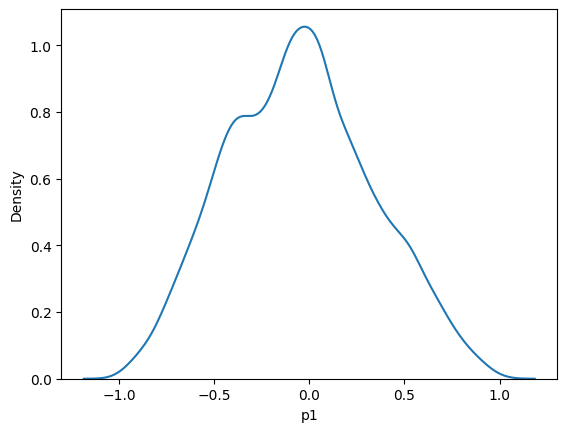

In [ ]:
sns.kdeplot(df.iloc[:,6])

In [ ]:
df=train_df

In [ ]:

import sklearn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from keras.models import Sequential,Model
from keras.layers import Input,Dense, LeakyReLU, Dropout


def define_discriminator(n_inputs=43):
    inputs = Input(shape=(n_inputs,))

    hidden1 = Dense(60)(inputs)
    hidden1_activation = LeakyReLU(0.2)(hidden1)
    # dropout1 = Dropout(0.3)(hidden1_activation)

    hidden2 = Dense(50)(hidden1_activation)
    hidden2_activation = LeakyReLU(0.2)(hidden2)
    # dropout2 = Dropout(0.2)(hidden2_activation)

    hidden3 = Dense(40)(hidden2_activation)
    hidden3_activation = LeakyReLU(0.2)(hidden3)
    dropout3 = Dropout(0.4)(hidden3_activation)

    output = Dense(1, activation='sigmoid')(dropout3)

    model = Model(inputs=inputs, outputs=output)
    opt= Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def generate_real_samples(df, n):

    df_sample = df.sample(n)

    X1 = df_sample[['IP1_Event_Magnitude', 'log(IP2_R_epi)','IP2_R_epi', 'log(IP3_Vs30)','IP4_Event_Depth','IP5_Fault']].values

    X2 = df_sample[[f'p{i+1}' for i in range(37)]].values

    X = np.hstack((X1, X2))

    y = np.ones((n, 1))
    return X, y

def generate_fake_samples(n):

    X1 = -1 + np.random.rand(n, 6) * 2

    X2 = -1 + np.random.rand(n, 37) * 2
    X = np.hstack((X1, X2))

    y = np.zeros((n, 1))
    return X, y


def train_discriminator(model, df, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)

    for i in range(n_epochs):

        X_real, y_real = generate_real_samples(df,half_batch)

        discriminator.train_on_batch(X_real, y_real)

        X_fake, y_fake = generate_fake_samples(half_batch)

        discriminator.train_on_batch(X_fake, y_fake)

        _, acc_real = discriminator.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose=0)
        if(i%100==0):
            print(i, acc_real, acc_fake)


discriminator= define_discriminator()

discriminator.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 43)]              0         
                                                                 
 dense (Dense)               (None, 60)                2640      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                2040      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 40)                0     

In [ ]:

df.head()

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,-0.081081,0.501797,-0.639681,-0.295725,-0.593985,-1.0,0.162956,0.161579,0.139791,0.127682,...,0.336641,0.352736,0.344682,0.311766,0.309364,0.273634,0.227240,0.191480,0.164768,0.148486
1,-0.837838,0.257727,-0.845218,0.566235,-0.769424,-1.0,-0.126054,-0.126980,-0.140832,-0.087734,...,-0.099524,-0.076764,-0.090592,-0.117683,-0.141791,-0.187880,-0.225653,-0.257230,-0.278734,-0.282871
2,-0.837838,0.487980,-0.656460,0.409972,-0.573935,1.0,0.277312,0.277084,0.262292,0.255284,...,0.008625,0.014877,-0.008636,-0.021212,-0.026611,-0.039992,-0.052164,-0.063686,-0.068016,-0.066794
3,-0.729730,0.601174,-0.492450,0.102053,-0.573935,-1.0,-0.749271,-0.751900,-0.767708,-0.768788,...,-0.266228,-0.292428,-0.307410,-0.312138,-0.311321,-0.313845,-0.341837,-0.385109,-0.416080,-0.437072
4,-1.000000,0.133236,-0.899748,0.560778,-0.759398,-1.0,0.361009,0.360624,0.361922,0.424092,...,-0.013670,-0.014428,-0.033095,-0.040647,-0.049014,-0.057166,-0.066625,-0.077018,-0.081015,-0.079738


Below code will take around 1 hr


In [ ]:
print('discriminator shapes: ',discriminator.input_shape,discriminator.output_shape)
train_discriminator(discriminator,df)

discriminator shapes:  (None, 43) (None, 1)
0 0.703125 0.15625
100 1.0 1.0
200 1.0 1.0
300 1.0 1.0
400 1.0 1.0
500 1.0 1.0
600 1.0 1.0
700 1.0 1.0
800 1.0 1.0
900 1.0 1.0


In [ ]:
testing_df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,0.135135,0.550180,-0.574245,0.247441,-0.588972,1.000000,0.234276,0.232923,0.210157,0.194965,...,0.443234,0.419895,0.407895,0.417637,0.390362,0.387562,0.366603,0.332982,0.311443,0.308895
1,1.000000,0.568456,-0.546560,0.251639,1.000000,1.000000,0.408740,0.408417,0.388437,0.374718,...,0.458115,0.450697,0.428731,0.414675,0.395875,0.387270,0.353376,0.319094,0.298624,0.312946
2,-0.837838,0.547597,-0.578020,-0.465208,0.187970,0.333333,-0.095563,-0.096632,-0.114419,-0.118325,...,-0.182564,-0.185206,-0.205602,-0.216510,-0.226940,-0.240123,-0.251504,-0.266441,-0.269373,-0.271668
3,-0.351351,0.125978,-0.902265,0.141778,0.102757,-0.333333,0.419999,0.419677,0.403744,0.416047,...,0.225613,0.216448,0.193233,0.183787,0.171314,0.152683,0.133944,0.116461,0.107825,0.106099
4,-0.945946,0.201133,-0.872903,0.141668,-0.127820,1.000000,0.239588,0.239625,0.224839,0.248619,...,-0.086403,-0.080534,-0.096149,-0.100629,-0.108602,-0.116101,-0.123858,-0.131560,-0.133810,-0.131522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-0.027027,0.146089,-0.895134,-0.058017,-0.483709,-1.000000,0.512439,0.512147,0.493593,0.494007,...,0.489415,0.467844,0.428287,0.402530,0.384473,0.366478,0.343040,0.314909,0.294371,0.282804
2331,-0.945946,0.335281,-0.797399,0.233628,-0.573935,0.333333,0.044115,0.043054,0.023414,0.013242,...,-0.105727,-0.102000,-0.120949,-0.126206,-0.136055,-0.144416,-0.152566,-0.161478,-0.164031,-0.162733
2332,-0.891892,0.653719,-0.391779,0.301554,-0.634085,0.333333,-0.526883,-0.527539,-0.536380,-0.550768,...,-0.252000,-0.286600,-0.310989,-0.313448,-0.342196,-0.392407,-0.425814,-0.436266,-0.445649,-0.455267
2333,-0.729730,0.746599,-0.162752,-0.328521,0.022556,0.333333,-0.530400,-0.529548,-0.544575,-0.504894,...,-0.411627,-0.408636,-0.444823,-0.464993,-0.474864,-0.484003,-0.500026,-0.517385,-0.526652,-0.531782


In [ ]:
# Save discriminator model and its weights
from keras.models import save_model
path='/content/drive/MyDrive/Trials/trial_10'
# save_model(discriminator, drive_path + "discriminator.h5")
discriminator.save(f"{path}/discri_for_6_input.keras")
# discriminator.save(f"{path}/discri.h5")


In [ ]:
from keras.models import load_model

# # Load the discriminator model
desc_path='/content/drive/MyDrive/Trials/trial_5/discri_for_6_input.keras'
discriminator=load_model(desc_path)

In [ ]:
discriminator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 43)]              0         
                                                                 
 dense (Dense)               (None, 60)                2640      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                3050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                2040      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 40)                0     

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
test_df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,0.135135,0.550180,-0.574245,0.247441,-0.588972,1.000000,0.234276,0.232923,0.210157,0.194965,...,0.443234,0.419895,0.407895,0.417637,0.390362,0.387562,0.366603,0.332982,0.311443,0.308895
1,1.000000,0.568456,-0.546560,0.251639,1.000000,1.000000,0.408740,0.408417,0.388437,0.374718,...,0.458115,0.450697,0.428731,0.414675,0.395875,0.387270,0.353376,0.319094,0.298624,0.312946
2,-0.837838,0.547597,-0.578020,-0.465208,0.187970,0.333333,-0.095563,-0.096632,-0.114419,-0.118325,...,-0.182564,-0.185206,-0.205602,-0.216510,-0.226940,-0.240123,-0.251504,-0.266441,-0.269373,-0.271668
3,-0.351351,0.125978,-0.902265,0.141778,0.102757,-0.333333,0.419999,0.419677,0.403744,0.416047,...,0.225613,0.216448,0.193233,0.183787,0.171314,0.152683,0.133944,0.116461,0.107825,0.106099
4,-0.945946,0.201133,-0.872903,0.141668,-0.127820,1.000000,0.239588,0.239625,0.224839,0.248619,...,-0.086403,-0.080534,-0.096149,-0.100629,-0.108602,-0.116101,-0.123858,-0.131560,-0.133810,-0.131522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-0.027027,0.146089,-0.895134,-0.058017,-0.483709,-1.000000,0.512439,0.512147,0.493593,0.494007,...,0.489415,0.467844,0.428287,0.402530,0.384473,0.366478,0.343040,0.314909,0.294371,0.282804
2331,-0.945946,0.335281,-0.797399,0.233628,-0.573935,0.333333,0.044115,0.043054,0.023414,0.013242,...,-0.105727,-0.102000,-0.120949,-0.126206,-0.136055,-0.144416,-0.152566,-0.161478,-0.164031,-0.162733
2332,-0.891892,0.653719,-0.391779,0.301554,-0.634085,0.333333,-0.526883,-0.527539,-0.536380,-0.550768,...,-0.252000,-0.286600,-0.310989,-0.313448,-0.342196,-0.392407,-0.425814,-0.436266,-0.445649,-0.455267
2333,-0.729730,0.746599,-0.162752,-0.328521,0.022556,0.333333,-0.530400,-0.529548,-0.544575,-0.504894,...,-0.411627,-0.408636,-0.444823,-0.464993,-0.474864,-0.484003,-0.500026,-0.517385,-0.526652,-0.531782


In [ ]:
import keras
from keras.layers import Input, Concatenate, Dense
from keras.models import Model

In [ ]:
from keras.layers import Input, Dense, Concatenate
from keras.models import Model



def define_generator(latent_dim, n_conditions=6, n_outputs=43):
    noise = Input(shape=(latent_dim,))
    condition = Input(shape=(n_conditions,))
    merged = Concatenate()([noise, condition])

    hidden1 = Dense(30)(merged)
    hidden1_activation = LeakyReLU(0.2)(hidden1)

    hidden2 = Dense(40)(hidden1_activation)
    hidden2_activation = LeakyReLU(0.2)(hidden2)

    hidden3 = Dense(50)(hidden2_activation)
    hidden3_activation = LeakyReLU(0.2)(hidden3)

    # hidden4 = Dense(40)(hidden3_activation)
    # hidden4_activation = LeakyReLU(0.2)(hidden4)

    output = Dense(37, activation='tanh')(hidden3_activation)

    model = Model(inputs=[noise, condition], outputs=Concatenate()([condition, output]))
    return model





# Example usage
generator = define_generator(latent_dim=3)
generator.summary()


print('generator shape: ',generator.output_shape)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 9)                    0         ['input_2[0][0]',             
                                                                     'input_3[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 30)                   300       ['concatenate[0][0]']   

In [ ]:

def generate_latent_points(latent_dim, n_conditions, n, df):

    z_input = randn(latent_dim * n)

    c_input = df.sample(n)[['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi', 'log(IP3_Vs30)', 'IP4_Event_Depth', 'IP5_Fault']].values

    z_input = z_input.reshape(n, latent_dim)
    return [z_input, c_input]

def generate_fake_samples_1(generator, latent_dim, n_conditions, n, df):

    z_input, c_input = generate_latent_points(latent_dim, n_conditions, n, df)

    X = generator.predict([z_input, c_input])

    y = np.zeros((n, 1))
    return X, y


# def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):

#     x_real, y_real = generate_real_samples(df,n)

#     _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)

#     x_fake, y_fake = generate_fake_samples_1(generator, latent_dim,n_conditions, n,df)

#     _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
#     print(epoch, acc_real, acc_fake)

def define_gan(generator, discriminator):
    discriminator.trainable = False

    noise_shape = generator.input_shape[0][1:]
    condition_shape = generator.input_shape[1][1:]

    noise = Input(shape=noise_shape)
    condition = Input(shape=condition_shape)

    g_output = generator([noise, condition])

    d_output = discriminator(g_output)

    gan_model = Model([noise, condition], d_output)

    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    gan_model.compile(loss='binary_crossentropy', optimizer=opt)
    return gan_model


In [ ]:
# def predict(generator, sample, latent_dim):

#     z_input = np.random.randn(latent_dim).reshape(1, -1)
#     generated_output = generator.predict([z_input, sample])
#     return generated_output

In [ ]:
def predict(generator, sample, latent_dim,total_data):

    z_input = np.random.randn(total_data,latent_dim)
    generated_output = generator.predict([z_input, sample])
    return generated_output

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
time=[0,0.01,0.025,0.04,0.05,0.07,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.6,0.7,0.75,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.5,3,3.5,4,4.5,5,6,7,8,9,10]

In [ ]:
print(len(time))

37


In [ ]:
z=0

In [ ]:
test_df

,IP1_Event_Magnitude,log(IP2_R_epi),IP2_R_epi,log(IP3_Vs30),IP4_Event_Depth,IP5_Fault,p1,p2,p3,p4,...,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37
0,0.135135,0.550180,-0.574245,0.247441,-0.588972,1.000000,0.234276,0.232923,0.210157,0.194965,...,0.443234,0.419895,0.407895,0.417637,0.390362,0.387562,0.366603,0.332982,0.311443,0.308895
1,1.000000,0.568456,-0.546560,0.251639,1.000000,1.000000,0.408740,0.408417,0.388437,0.374718,...,0.458115,0.450697,0.428731,0.414675,0.395875,0.387270,0.353376,0.319094,0.298624,0.312946
2,-0.837838,0.547597,-0.578020,-0.465208,0.187970,0.333333,-0.095563,-0.096632,-0.114419,-0.118325,...,-0.182564,-0.185206,-0.205602,-0.216510,-0.226940,-0.240123,-0.251504,-0.266441,-0.269373,-0.271668
3,-0.351351,0.125978,-0.902265,0.141778,0.102757,-0.333333,0.419999,0.419677,0.403744,0.416047,...,0.225613,0.216448,0.193233,0.183787,0.171314,0.152683,0.133944,0.116461,0.107825,0.106099
4,-0.945946,0.201133,-0.872903,0.141668,-0.127820,1.000000,0.239588,0.239625,0.224839,0.248619,...,-0.086403,-0.080534,-0.096149,-0.100629,-0.108602,-0.116101,-0.123858,-0.131560,-0.133810,-0.131522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-0.027027,0.146089,-0.895134,-0.058017,-0.483709,-1.000000,0.512439,0.512147,0.493593,0.494007,...,0.489415,0.467844,0.428287,0.402530,0.384473,0.366478,0.343040,0.314909,0.294371,0.282804
2331,-0.945946,0.335281,-0.797399,0.233628,-0.573935,0.333333,0.044115,0.043054,0.023414,0.013242,...,-0.105727,-0.102000,-0.120949,-0.126206,-0.136055,-0.144416,-0.152566,-0.161478,-0.164031,-0.162733
2332,-0.891892,0.653719,-0.391779,0.301554,-0.634085,0.333333,-0.526883,-0.527539,-0.536380,-0.550768,...,-0.252000,-0.286600,-0.310989,-0.313448,-0.342196,-0.392407,-0.425814,-0.436266,-0.445649,-0.455267
2333,-0.729730,0.746599,-0.162752,-0.328521,0.022556,0.333333,-0.530400,-0.529548,-0.544575,-0.504894,...,-0.411627,-0.408636,-0.444823,-0.464993,-0.474864,-0.484003,-0.500026,-0.517385,-0.526652,-0.531782


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
out_path='/content/drive/MyDrive/Trials/trial_10'

In [ ]:
test_df=testing_df.head(500)

In [ ]:
best_r2=-1000

In [ ]:
k=0

In [ ]:
z=0
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    global z,best_r2,k
    z+=100
    x_real, y_real = generate_real_samples(df,n)

    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)

    x_fake, y_fake = generate_fake_samples_1(generator, latent_dim,n_conditions, n,df)

    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    print(epoch, acc_real, acc_fake)



    sample_1 = test_df[['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'IP2_R_epi','log(IP3_Vs30)', 'IP4_Event_Depth','IP5_Fault']].values
    out=predict(generator, sample_1, latent_dim,len(sample_1))
    pred_val=scaler.inverse_transform(out)
    pred_df=pd.DataFrame(pred_val)
    true_df=pd.DataFrame(scaler.inverse_transform(test_df))
    # true_df=test_df
    score=[]
    for i in range(6,43):
      r=r2_score(true_df.iloc[:,i],pred_df.iloc[:,i])
      score.append(r)
    score=np.array(score)
    result=pd.DataFrame(score)
    # print(pred_df.iloc[:,:7])
    # print(true_df.iloc[:,:7])
    # pred_val=scaler.inverse_transform(out)
    # pred_df=pd.DataFrame(out)

    # result.to_excel(f'{out}/r2score_{}.xlsx'.format(z), index=False)
    cur_r2=r2_score(true_df.iloc[:,6:],pred_df.iloc[:,6:])
    if(cur_r2>best_r2):
       best_r2=cur_r2
       k=epoch

    print('r2_score for test data :',epoch,cur_r2)
    print('till now best r2 is :',k,best_r2)



In [ ]:

gan_model = define_gan(generator, discriminator)
print("Hello test")

gan_model.summary()


Hello test
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 model_1 (Functional)        (None, 43)                   5477      ['input_4[0][0]',             
                                                                     'input_5[0][0]']             
                                                                                                  
 model (Functional)          (None, 1)                    7771      ['model_1[0][

Below code will take too much time


In [ ]:
# latent_dim=5

In [ ]:

def train(generator, discriminator, gan_model, latent_dim, n_conditions, df, n_epochs=10000, n_batch=128, n_eval=100):

    half_batch = int(n_batch / 2)

    for i in range(n_epochs):

        x_real, y_real = generate_real_samples(df,half_batch)

        x_fake, y_fake = generate_fake_samples_1(generator, latent_dim, n_conditions, half_batch, df)

        discriminator.train_on_batch(x_real, y_real)
        discriminator.train_on_batch(x_fake, y_fake)

        z_gan, c_gan = generate_latent_points(latent_dim,n_conditions, n_batch,df)

        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch([z_gan, c_gan], y_gan)

        if (i+1) % n_eval == 0:
            summarize_performance(i, generator, discriminator, latent_dim)
        if(i+1)%100==0:

            # generator.save(f"/content/drive/My Drive/Images/gene_{i}.h5")
            generator.save(f'{out_path}/generator_{i}.h5')

latent_dim = 3

n_conditions = 6

train(generator, discriminator, gan_model, latent_dim, n_conditions, train_df)


4/4 [==============================] - 0s 3ms/step
99 0.8799999952316284 0.9900000095367432
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 99 -0.1355675491977327
till now best r2 is : 99 -0.1355675491977327
4/4 [==============================] - 0s 3ms/step
199 0.8999999761581421 1.0
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 199 -0.07337916914560856
till now best r2 is : 199 -0.07337916914560856
4/4 [==============================] - 0s 6ms/step
299 0.8100000023841858 0.9700000286102295
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 299 -0.09389157233633004
till now best r2 is : 199 -0.07337916914560856
4/4 [==============================] - 0s 3ms/step
399 0.8399999737739563 0.8100000023841858
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 399 -0.13523823402996038
till now best r2 is : 199 -0.07337916914560856
4/4 [==============================] - 0s 3ms/step
499 0.8199999928474426 0.9200000166893005
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 499 -0.12937924374338697
till now best r2 is : 199 -0.07337916914560856
4/4 [==============================] - 0s 4ms/step
599 0.7099999785423279 0.9599999785423279
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 599 -0.08432992244663284
till now best r2 is : 199 -0.07337916914560856
4/4 [==============================] - 0s 3ms/step
699 0.6700000166893005 0.9100000262260437
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 699 -0.012610415273537802
till now best r2 is : 699 -0.012610415273537802
4/4 [==============================] - 0s 4ms/step
799 0.6000000238418579 0.8500000238418579
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 799 0.07013059247438817
till now best r2 is : 799 0.07013059247438817
4/4 [==============================] - 0s 4ms/step
899 0.7599999904632568 0.7699999809265137
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 899 0.2497856421471897
till now best r2 is : 899 0.2497856421471897
4/4 [==============================] - 0s 4ms/step
999 0.6800000071525574 0.8299999833106995
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 999 0.36154006377363745
till now best r2 is : 999 0.36154006377363745
4/4 [==============================] - 0s 4ms/step
1099 0.5099999904632568 0.8600000143051147
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1099 0.5511203553912355
till now best r2 is : 1099 0.5511203553912355
4/4 [==============================] - 0s 4ms/step
1199 0.44999998807907104 0.8999999761581421
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1199 0.6641701924301234
till now best r2 is : 1199 0.6641701924301234
4/4 [==============================] - 0s 6ms/step
1299 0.5199999809265137 0.8100000023841858
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1299 0.6789260518271443
till now best r2 is : 1299 0.6789260518271443
4/4 [==============================] - 0s 4ms/step
1399 0.46000000834465027 0.7400000095367432
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1399 0.6689968691787653
till now best r2 is : 1299 0.6789260518271443
4/4 [==============================] - 0s 4ms/step
1499 0.4099999964237213 0.8199999928474426
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1499 0.6696226828189876
till now best r2 is : 1299 0.6789260518271443
4/4 [==============================] - 0s 3ms/step
1599 0.5899999737739563 0.6899999976158142
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1599 0.6693108902336469
till now best r2 is : 1299 0.6789260518271443
4/4 [==============================] - 0s 4ms/step
1699 0.4699999988079071 0.8100000023841858
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1699 0.6754825636248019
till now best r2 is : 1299 0.6789260518271443
4/4 [==============================] - 0s 4ms/step
1799 0.5099999904632568 0.7699999809265137
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1799 0.6847787665305338
till now best r2 is : 1799 0.6847787665305338
4/4 [==============================] - 0s 4ms/step
1899 0.5199999809265137 0.8100000023841858
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1899 0.6942341184881686
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
1999 0.5699999928474426 0.7900000214576721
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 1999 0.670250757869819
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
2099 0.44999998807907104 0.8399999737739563
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2099 0.6543144159152969
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
2199 0.5099999904632568 0.7699999809265137
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2199 0.6546273839209309
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 3ms/step
2299 0.4699999988079071 0.7799999713897705
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2299 0.643793099933804
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 5ms/step
2399 0.49000000953674316 0.8100000023841858
16/16 [==============================] - 0s 2ms/step
r2_score for test data : 2399 0.6407489754166381
till now best r2 is :

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
2499 0.5699999928474426 0.7300000190734863
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2499 0.6535699746552762
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
2599 0.5299999713897705 0.7200000286102295
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2599 0.6472701609560999
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
2699 0.49000000953674316 0.6600000262260437
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2699 0.6665364651569612
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 3ms/step
2799 0.5 0.6899999976158142
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2799 0.6482569233788428
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 5ms/step
2899 0.5400000214576721 0.6299999952316284
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2899 0.6460402554629663
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
2999 0.5899999737739563 0.7400000095367432
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 2999 0.6527032263230186
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3099 0.6000000238418579 0.6000000238418579
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3099 0.680116957414581
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 7ms/step
3199 0.4399999976158142 0.6399999856948853
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3199 0.6517234161893658
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 5ms/step
3299 0.550000011920929 0.6200000047683716
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3299 0.6643208704075207
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3399 0.38999998569488525 0.7599999904632568
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3399 0.6733925718607489
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3499 0.5199999809265137 0.6600000262260437
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3499 0.6755199643365752
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 6ms/step
3599 0.4300000071525574 0.6899999976158142
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3599 0.6718636750177758
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3699 0.46000000834465027 0.5699999928474426
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3699 0.6650262410195686
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3799 0.3700000047683716 0.7099999785423279
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3799 0.6879024431135556
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3899 0.4300000071525574 0.6700000166893005
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3899 0.6567503453020435
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
3999 0.5699999928474426 0.6899999976158142
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 3999 0.6856066472939564
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 3ms/step
4099 0.44999998807907104 0.6899999976158142
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4099 0.6674601583983816
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4199 0.4399999976158142 0.6499999761581421
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4199 0.6838081845828199
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4299 0.4000000059604645 0.7099999785423279
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4299 0.6862300980553552
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4399 0.4000000059604645 0.7099999785423279
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4399 0.6779536140296574
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4499 0.4000000059604645 0.699999988079071
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4499 0.6737863786312506
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 6ms/step
4599 0.44999998807907104 0.8199999928474426
16/16 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4599 0.672924920553824
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 3ms/step
4699 0.4399999976158142 0.7300000190734863
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4699 0.6914555363198984
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4799 0.4399999976158142 0.7300000190734863
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4799 0.6940664343412094
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4899 0.3199999928474426 0.7699999809265137
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4899 0.6865482042468873
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
4999 0.3400000035762787 0.800000011920929
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 4999 0.6809046359746371
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
5099 0.3799999952316284 0.6100000143051147
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5099 0.6907035208644375
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 3ms/step
5199 0.47999998927116394 0.6100000143051147
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5199 0.6901382815300722
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 8ms/step
5299 0.6299999952316284 0.5400000214576721
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5299 0.6834511747914628
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
5399 0.4099999964237213 0.6700000166893005
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5399 0.6436332848717969
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
5499 0.5400000214576721 0.6100000143051147
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5499 0.6418811488380516
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 6ms/step
5599 0.3700000047683716 0.7900000214576721
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5599 0.6202427306588626
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
5699 0.4000000059604645 0.6399999856948853
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5699 0.6639881720224984
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
5799 0.33000001311302185 0.7200000286102295
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5799 0.6458550882246822
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 3ms/step
5899 0.550000011920929 0.44999998807907104
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5899 0.6396422215844684
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 5ms/step
5999 0.28999999165534973 0.800000011920929
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 5999 0.6399565146604694
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
6099 0.4000000059604645 0.699999988079071
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6099 0.659992195828054
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 5ms/step
6199 0.4300000071525574 0.6000000238418579
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6199 0.6722333383540263
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
6299 0.49000000953674316 0.5400000214576721
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6299 0.6441419726382821
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 5ms/step
6399 0.33000001311302185 0.8700000047683716
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6399 0.6081518376772941
till now best r2 is : 1899 0.6942341184881686
4/4 [==============================] - 0s 4ms/step
6499 0.46000000834465027 0.7400000095367432
16/16 [==============================] - 0s 2ms/step
r2_score for test data : 6499 0.6960433530708661
till now best r2 is : 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6499 0.6960433530708661
4/4 [==============================] - 0s 7ms/step
6599 0.5400000214576721 0.4399999976158142
16/16 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6599 0.6681649899027352
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 5ms/step
6699 0.36000001430511475 0.6600000262260437
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6699 0.6763991124991182
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
6799 0.41999998688697815 0.7200000286102295
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6799 0.6812038496934757
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
6899 0.4099999964237213 0.7200000286102295
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6899 0.6496913545887794
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 3ms/step
6999 0.46000000834465027 0.5600000023841858
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 6999 0.6639094723783276
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 5ms/step
7099 0.699999988079071 0.28999999165534973
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7099 0.6526518438261018
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
7199 0.4000000059604645 0.75
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7199 0.6583946377094855
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 5ms/step
7299 0.28999999165534973 0.7200000286102295
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7299 0.6269132544328332
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
7399 0.4699999988079071 0.6299999952316284
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7399 0.6618828830033875
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 6ms/step
7499 0.41999998688697815 0.6700000166893005
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7499 0.6816721092944678
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 6ms/step
7599 0.5 0.6200000047683716
16/16 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7599 0.666474667295513
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
7699 0.4399999976158142 0.6600000262260437
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7699 0.6493013309446315
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 3ms/step
7799 0.44999998807907104 0.6200000047683716
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7799 0.653815064582924
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
7899 0.3100000023841858 0.7900000214576721
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7899 0.6351266238840219
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 5ms/step
7999 0.3199999928474426 0.6000000238418579
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 7999 0.6697624203786191
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8099 0.20000000298023224 0.7699999809265137
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8099 0.6185939893246403
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8199 0.46000000834465027 0.6100000143051147
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8199 0.6628698259842238
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8299 0.5899999737739563 0.6100000143051147
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8299 0.6114262469622055
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8399 0.4699999988079071 0.6100000143051147
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8399 0.6746655377247937
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 5ms/step
8499 0.4300000071525574 0.75
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8499 0.6821053178185691
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8599 0.3499999940395355 0.5400000214576721
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8599 0.6810476514014371
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8699 0.30000001192092896 0.7099999785423279
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8699 0.6507637171803202
till now best r2 is : 6499 0.6960433530708661
4/4 [==============================] - 0s 4ms/step
8799 0.49000000953674316 0.5899999737739563
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8799 0.7114986704671933
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 4ms/step
8899 0.47999998927116394 0.6499999761581421
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8899 0.6779249810665149
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 5ms/step
8999 0.5799999833106995 0.4399999976158142
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 8999 0.6412391831230448
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 3ms/step
9099 0.36000001430511475 0.7099999785423279
16/16 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9099 0.6771484969373677
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 6ms/step
9199 0.41999998688697815 0.6800000071525574
16/16 [==============================] - 0s 2ms/step
r2_score for test data : 9199 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.630575559783274
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 3ms/step
9299 0.4000000059604645 0.7699999809265137
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9299 0.6077161389081678
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 4ms/step
9399 0.3499999940395355 0.7799999713897705
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9399 0.6226596141253039
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 3ms/step
9499 0.4399999976158142 0.6200000047683716
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9499 0.5887365361226411
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 6ms/step
9599 0.46000000834465027 0.5600000023841858
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9599 0.6290005193284671
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 5ms/step
9699 0.5199999809265137 0.5799999833106995
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9699 0.6376946244392964
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 4ms/step
9799 0.4000000059604645 0.8399999737739563
16/16 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9799 0.6389735958645266
till now best r2 is : 8799 0.7114986704671933
4/4 [==============================] - 0s 7ms/step
9899 0.3799999952316284 0.7300000190734863
16/16 [==============================] - 0s 2ms/step
r2_score for test data : 9899 0.6768525758847089
till now best r2 is :

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 8799 0.7114986704671933
4/4 [==============================] - 0s 6ms/step
9999 0.4300000071525574 0.7099999785423279
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


r2_score for test data : 9999 0.6734468713297413
till now best r2 is : 8799 0.7114986704671933


Now we are saving our models first to our drive


In [ ]:

from keras.models import save_model
# Define the path to your Google Drive directory
drive_path = '/content/drive/My Drive/Images/'

# Save GAN model and its weights
save_model(gan_model, drive_path + "gan_model.h5")
gan_model.save_weights(drive_path + 'gan_weights.h5')

# Save generator model and its weights
save_model(generator, drive_path + "generator.h5")
generator.save_weights(drive_path + 'gen_weights.h5')






In [ ]:
def predict(generator, sample, latent_dim):

    z_input = np.random.randn(latent_dim).reshape(1, -1)
    generated_output = generator.predict([z_input, sample])
    return generated_output


sample = test_df[['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'log(IP3_Vs30)','IP4_Event_Depth']].iloc[0].values.reshape(1, -1)



NameError: name 'test_df' is not defined

In [ ]:
sample

In [ ]:
predicted_output = predict(generator, sample, latent_dim)

In [ ]:
x=scaler.inverse_transform(predicted_output)

In [ ]:
x

In [ ]:
true_values_op = test_df.iloc[0,:].values

In [ ]:
len(true_values_op)

In [ ]:
out=[]
for i in range(len(test_df)):

    sample = test_df[['IP1_Event_Magnitude', 'log(IP2_R_epi)', 'log(IP3_Vs30)','IP4_Event_Depth']].iloc[i].values.reshape(1, -1)


    predicted_output = predict(generator, sample, latent_dim)
    pred_val = np.append(sample, predicted_output[0][4:])



    pred_val = scaler.inverse_transform([pred_val])

    out.append(pred_val)

In [ ]:
len(out[0][0])

In [ ]:
pr_1 = [sublist[0] for sublist in out]

In [ ]:
pr_1[0:5]

In [ ]:
pr=[sublist[9] for sublist in pr_1]

In [ ]:
pr[0:5]

In [ ]:
tr=scaler.inverse_transform(test_df)

In [ ]:
tr[0]

In [ ]:
len(tr[0])

In [ ]:
tr_1=[sublist[9] for sublist in tr]

In [ ]:
tr_1[0:5]

In [ ]:
tru_values=tr_1
pred_values=pr

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate R-squared for test data
r_squared_test = r2_score(tru_values, pred_values)

# Scatter plot for test data
plt.scatter(tru_values, pred_values, color='blue', label=f'Actual vs Predicted (R-squared: {r_squared_test:.2f})')

# Calculate the range for plotting the perfect prediction line
min_val = min(np.min(tru_values), np.min(pred_values))
max_val = max(np.max(tru_values), np.max(pred_values))

# Plot the perfect prediction line
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_test_pred)')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Show plot
plt.show()